In [1]:
!pip install uproot awkward lz4 xxhash
!pip install zfit


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import uproot
f=uproot.open ("/content/drive/MyDrive/B2HHH_MagnetDown.root")
f.keys()

['DecayTree;1']

In [3]:
from numpy import *
import matplotlib
import matplotlib.pyplot as plt
tree=f["DecayTree"].arrays(library="np")

In [4]:
#defining useful classes and functions
class Daughter:
  def __init__(self, tree, name):
    self.PX=tree["{}_PX".format(name)]
    self.PY=tree["{}_PY".format(name)]
    self.PZ=tree["{}_PZ".format(name)]
    self.PTOT=sqrt(square(self.PX)+square(self.PY)+square(self.PZ))#total momentum of the daughter particle
    self.ProbK=tree["{}_ProbK".format(name)]
    self.ProbPi=tree["{}_ProbPi".format(name)]

  def getTotalEnergy(self, mass):
    return  sqrt(square(self.PTOT)+mass**2)#total energy of the particle

def totalMomentumMother(H1,H2,H3):
  return sqrt(square(H1.PX+H2.PX+H3.PX)+square(H1.PY+H2.PY+H3.PY)+square(H1.PZ+H2.PZ+H3.PZ))

def massMother(H1,H2,H3,mass):
  return sqrt(square(H1.getTotalEnergy(mass)+H2.getTotalEnergy(mass)+H3.getTotalEnergy(mass))-square(totalMomentumMother(H1,H2,H3)))





In [5]:
#creating the istances for the three daughter particles
H1=Daughter(tree,'H1')
H2=Daughter(tree,'H2')
H3=Daughter(tree,'H3')


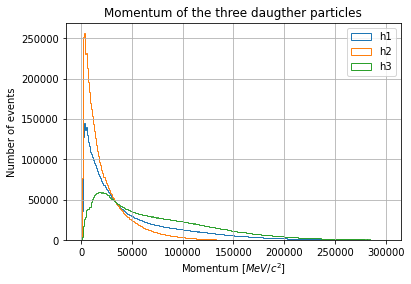

In [6]:
#plotting the hystogram
plt.hist(H1.PTOT,300,(0,300000),histtype='step',label='h1');
plt.hist(H2.PTOT,300,(0,300000),histtype='step',label='h2'); 
plt.hist(H3.PTOT,300,(0,300000),histtype='step',label='h3');  #the semicolon avoid printing the all array

plt.legend(loc='upper right');
plt.title("Momentum of the three daugther particles");
plt.xlabel('Momentum [$MeV/c^2$]');
plt.ylabel('Number of events');
plt.grid();

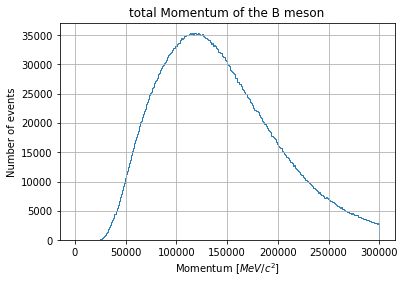

In [7]:
#Calculating the total momentum of the mother 
mother_ptot=totalMomentumMother(H1,H2,H3)


plt.hist(mother_ptot,300,(0,300000),histtype='step');

plt.title("total Momentum of the B meson");
plt.xlabel('Momentum [$MeV/c^2$]');
plt.ylabel('Number of events');
plt.grid();

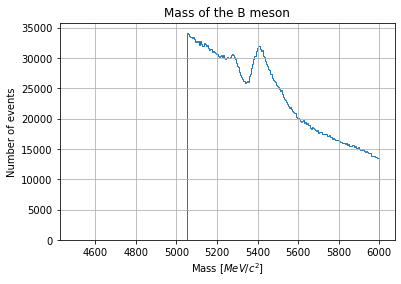

In [8]:
#total mass of the mother
massK=493.677
mass_mother=massMother(H1,H2,H3,massK)

plt.hist(mass_mother,300,(4500,6000),histtype='step');

plt.title("Mass of the B meson");
plt.xlabel('Mass [$MeV/c^2$]');
plt.ylabel('Number of events');
plt.grid();

#Does this match what we would expect from theory?

**ADD HERE EXPLANATION**

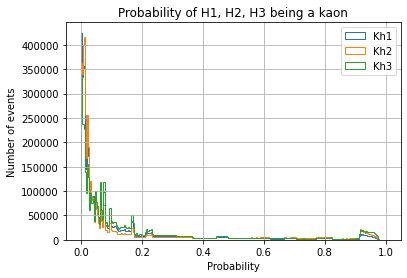

In [9]:
#Make plots of H1/H2/H3 _ProbK on one plot
plt.hist(H1.ProbK,300,(0,1),histtype='step',label='Kh1');
plt.hist(H2.ProbK,300,(0,1),histtype='step',label='Kh2');
plt.hist(H3.ProbK,300,(0,1),histtype='step',label='Kh3');
plt.title("Probability of H1, H2, H3 being a kaon");
plt.xlabel('Probability');
plt.ylabel('Number of events');
plt.legend(loc='upper right');
plt.grid();

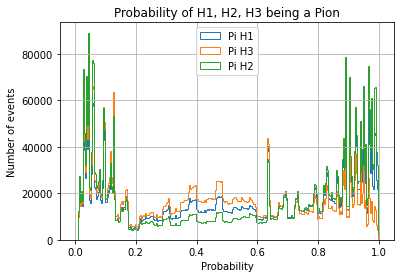

In [10]:
#Make plots of H1/H2/H3 _ProbPi on one plot
plt.hist(H1.ProbPi,300,(0,1),histtype='step',label='Pi H1');
plt.hist(H3.ProbPi,300,(0,1),histtype='step',label='Pi H3');
plt.hist(H2.ProbPi,300,(0,1),histtype='step',label='Pi H2');
plt.legend(loc='upper center');
plt.title("Probability of H1, H2, H3 being a Pion");
plt.xlabel('Probability');
plt.ylabel('Number of events');
plt.grid();


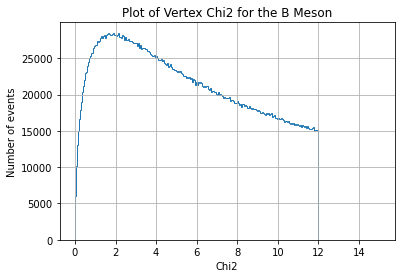

In [11]:
#make a plot of the B_VertexChi2
plt.hist(tree["B_VertexChi2"],300,(0,15),histtype='step',label='B vertex ki');

plt.xlabel('Chi2');
plt.ylabel('Number of events');
plt.title("Plot of Vertex Chi2 for the B Meson");
plt.grid();

In [12]:
#Making the selction
selection="(H1_ProbK>0.5) & (H2_ProbK>0.5) & (H3_ProbK>0.5) & (H1_ProbPi<0.15) & (H1_isMuon==0) & (H2_isMuon==0) &(H3_isMuon==0)& (H2_ProbPi<0.15) & (H3_ProbPi<0.15)"
cutTree=f["DecayTree"].arrays(library="np",cut=selection)



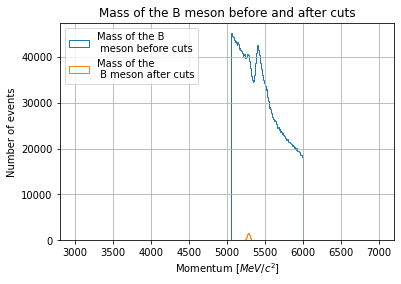

In [13]:
H1_cut=Daughter(cutTree,'H1')
H2_cut=Daughter(cutTree,'H2')
H3_cut=Daughter(cutTree,'H3')


mass_mother_cut=massMother(H1_cut,H2_cut,H3_cut,massK)

plt.hist(mass_mother,300,(4000,6000),histtype='step',label="Mass of the B \n meson before cuts");
plt.hist(mass_mother_cut,300,(3000,7000),histtype='step',label="Mass of the \n B meson after cuts");
plt.legend(loc='upper left');
plt.title("Mass of the B meson before and after cuts");
plt.xlabel('Momentum [$MeV/c^2$]');
plt.ylabel('Number of events');
plt.grid();


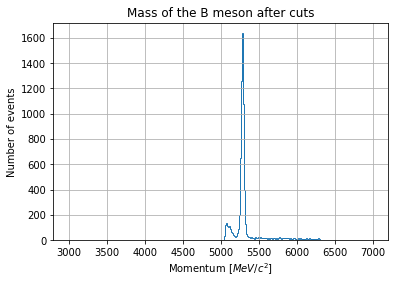

In [14]:
#mother cut alone

plt.hist(mass_mother_cut,300,(3000,7000),histtype='step');
plt.title("Mass of the B meson after cuts");
plt.xlabel('Momentum [$MeV/c^2$]');
plt.ylabel('Number of events');
plt.grid()

#What do you notice about your histogram now?


**Add here explanation**


In [15]:
#Before looking at that, try to use zfit again, starting from here....
# https://zfit.readthedocs.io/en/latest/getting_started/5_minutes_to_zfit.html 
#and then here for the plotting part:
# https://zfit.readthedocs.io/en/latest/_tmp/zfit-tutorials/introduction/Introduction.html 
#The gaussian signal must be lower than the peak. I NEED TO ADD THE BACKGROUND AFTERWARDS!

In [16]:
#Look at the selction parameters and how to put the error bars. Eventually, try to use again iminuit and maybe look at sanne code for inspiration
import zfit

mass=zfit.Space("mass",(5000,5800))# range of data I want to keep
data = zfit.Data.from_numpy(obs=mass, array=mass_mother_cut)#selecting the data in that range
data_np = zfit.run(data.value()[:, 0])
#Parameter for the gaussian signal
gaussMean=zfit.Parameter("mean", 5200,5000,6000)#adjust parameter or selection
gaussWidth=zfit.Parameter("sd", 40,0,6000)
gaussNorm=zfit.Parameter('signal_norm', data_np.shape[0]/30, 0, data_np.shape[0]*3 )
#fitting to create the pdf
signal = zfit.pdf.Gauss(obs=mass, mu=gaussMean, sigma=gaussWidth).create_extended(gaussNorm)


/usr/local/lib/python3.8/dist-packages/zfit/__init__.py:62: UserWarning: TensorFlow warnings are by default suppressed by zfit. In order to show them, set the environment variable ZFIT_DISABLE_TF_WARNINGS=0. In order to suppress the TensorFlow warnings AND this warning, set ZFIT_DISABLE_TF_WARNINGS=1.
  warnings.warn(


In [17]:
#background
lam = zfit.Parameter('lambda', -0.02, -2, +2)

background_norm=zfit.Parameter('background_norm', data_np.shape[0]/30, 0, data_np.shape[0]*3 )
background = zfit.pdf.Exponential(lam, obs=mass).create_extended(background_norm)


/usr/local/lib/python3.8/dist-packages/zfit/minimizers/fitresult.py:1318: FutureWarning: 'minuit_minos' will be changed as the default errors method to a custom implementationwith the same functionality. If you want to make sure that 'minuit_minos' will be used in the future, add it explicitly as in `errors(method='minuit_minos')`
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/zfit/minimizers/fitresult.py:1341: ChangedFeatureWarning: The behavior of this functionality recently changed.To turn this warning off, use `zfit.settings.changed_warnings.errors_name = False`  or 'all' with `zfit.settings.changed_warnings.all = False
Default name of errors (which is currently the method name such as `minuit_minos`or `zfit_errors`) has changed to `errors`. Old names are still added as well for compatibility but will be removed in the future. INSTRUCTIONS: to stay compatible, change wherever you access the error to 'errors' or specify the name explicitly in errors(...).
  warn_changed_fea

FitResult of
<ExtendedUnbinnedNLL model=[<zfit.<class 'zfit.models.functor.SumPDF'>  params=[Composed_autoparam_1, Composed_autoparam_2]] data=[<zfit.core.data.Data object at 0x7f6fd3a2ce20>] constraints=[]> 
with
<Minuit Minuit tol=0.001>

╒═════════╤═════════════╤══════════════════╤═══════╤═════════════╕
│ valid   │ converged   │ param at limit   │ edm   │ min value   │
╞═════════╪═════════════╪══════════════════╪═══════╪═════════════╡
│ True    │ True        │ False            │ 3e-06 │ -30644.39   │
╘═════════╧═════════════╧══════════════════╧═══════╧═════════════╛

Parameters
name               value  (rounded)               errors         minuit_minos    at limit
---------------  ------------------  -------------------  -------------------  ----------
signal_norm                 5143.54  -     74   +     75  -     74   +     75       False
background_norm             1970.47  -     48   +     49  -     48   +     49       False
mean                        5284.09  -   0.26   +   

'\n#plotting\n\n\n\ni=0\ncolors=["orange","black","blue"]\nlabels=["model","signal","background"]\n\nfor mod, frac in zip(model.pdfs, model.params.values()):\n  y_model=model.pdf(x)* data_np.shape[0] / bins * mass.area()\n  y_model*=frac\n  plt.plot(x, y_model,label=labels[i]);\n  i+=1\n\nplt.hist(data_np, bins=bins);\nplt.legend(loc="upper rigth");\n'

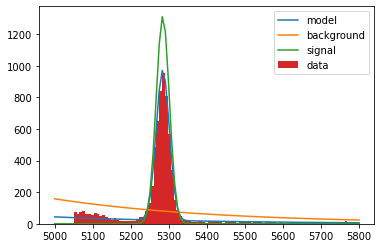

In [18]:
#combining the model

model = zfit.pdf.SumPDF([signal, background])

#Likelihood
nll = zfit.loss.ExtendedUnbinnedNLL(model=model, data=data)
# Stage 2: instantiate a minimiser (in this case a basic minuit minimizer)
minimizer = zfit.minimize.Minuit()

# Stage 3: minimise the given negative likelihood
result = minimizer.minimize(nll)
param_errors, _ = result.errors()
print(result)

#plotting manually

bins=100
lower,upper= data.data_range.limit1d
x=linspace(lower,upper,100)

y_model=model.pdf(x)* data_np.shape[0] / bins * mass.area()
y_backg=background.pdf(x)* data_np.shape[0] / bins * mass.area()
y_sign=signal.pdf(x)* data_np.shape[0] / bins * mass.area()
plt.plot(x, y_model,label="model");
plt.plot(x, y_backg,label="background");
plt.plot(x, y_sign,label="signal");
plt.hist(data_np, bins=bins,label="data");
plt.legend(loc="upper right");

'''
#plotting



i=0
colors=["orange","black","blue"]
labels=["model","signal","background"]

for mod, frac in zip(model.pdfs, model.params.values()):
  y_model=model.pdf(x)* data_np.shape[0] / bins * mass.area()
  y_model*=frac
  plt.plot(x, y_model,label=labels[i]);
  i+=1

plt.hist(data_np, bins=bins);
plt.legend(loc="upper rigth");
'''
#check if things need to be scaled or not
#check if the function needs to be binned or unbinned
#How to get the error bars
#changing colors
#Does not plot the bacgkround ...why?
#getting the chi square

In [19]:
#Below here, fitting whith Iminuit, remove at end if everything works with zfit#

'''
!pip install iminuit
!pip install numba_stats
import iminuit
from iminuit import cost,Minuit
import numba_stats
from numba_stats import truncnorm,truncexpon
range=(3000,7000)
#They have to be not normalized I guess
def gaussian(data,mu,sd):
  return numba_stats.truncnorm.pdf(data,*range, mu,sd)
def exponential(data, lam,width):
  return numba_stats.truncexpon.pdf(data,*range,lam,width)

def model(data, mu,sd,lam,width):
  return numba_stats.truncnorm.pdf(data,*range, mu,sd)+numba_stats.truncexpon.pdf(data,*range,lam,width)
'''

'\n!pip install iminuit\n!pip install numba_stats\nimport iminuit\nfrom iminuit import cost,Minuit\nimport numba_stats\nfrom numba_stats import truncnorm,truncexpon\nrange=(3000,7000)\n#They have to be not normalized I guess\ndef gaussian(data,mu,sd):\n  return numba_stats.truncnorm.pdf(data,*range, mu,sd)\ndef exponential(data, lam,width):\n  return numba_stats.truncexpon.pdf(data,*range,lam,width)\n\ndef model(data, mu,sd,lam,width):\n  return numba_stats.truncnorm.pdf(data,*range, mu,sd)+numba_stats.truncexpon.pdf(data,*range,lam,width)\n'

In [20]:
'''
import scipy
from scipy import stats

mean,sd=scipy.stats.norm.fit(mass_mother_cut)
lam,width=scipy.stats.expon.fit(mass_mother_cut)

signal=gaussian(mass_mother_cut,mean,sd)
bckg=exponential(mass_mother_cut,lam,width)

c =iminuit.cost.UnbinnedNLL(mass_mother_cut, model)
m = iminuit.Minuit(c, mu=mean,sd=sd,width=width,lam=lam)
m.migrad()

'''


'\nimport scipy\nfrom scipy import stats\n\nmean,sd=scipy.stats.norm.fit(mass_mother_cut)\nlam,width=scipy.stats.expon.fit(mass_mother_cut)\n\nsignal=gaussian(mass_mother_cut,mean,sd)\nbckg=exponential(mass_mother_cut,lam,width)\n\nc =iminuit.cost.UnbinnedNLL(mass_mother_cut, model)\nm = iminuit.Minuit(c, mu=mean,sd=sd,width=width,lam=lam)\nm.migrad()\n\n'

In [21]:
'''
m.visualize()
plt.hist(mass_mother_cut,300,(4500,6000),histtype='step');


#here something weird is happening.... the beckcground and the signal do not add up to the the model, but the model itself look fine
'''

"\nm.visualize()\nplt.hist(mass_mother_cut,300,(4500,6000),histtype='step');\n\n\n#here something weird is happening.... the beckcground and the signal do not add up to the the model, but the model itself look fine\n"

In [22]:
#Look at :https://hsf-training.github.io/hsf-training-scikit-hep-webpage/05-histograms/index.html
#option 1: https://iminuit.readthedocs.io/en/stable/notebooks/cost_functions.html
#option 2: https://zfit-tutorials.readthedocs.io/en/latest/tutorials/introduction/README.html

In [23]:
#Look here: 
#https://www.youtube.com/watch?v=Vgzqvhr6srU